Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

The dataset I will be working with is the insurance.csv file. This dataset has a lot of great data on insurance costs (for the insurance company) and the various variables that contribute to it. In this dataset, I am specifically interested in the relationship of healthcare charges to the other variables in this data with smoking being of particular interest. Smoking is the most indicative increase to health risk so I want to see its effects and influence on charges.
 


*******************
*******************
# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import model_selection

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop


*******************
*******************
# **Getting data**

1. load data with read_csv
2. pull up head of data
3. pull up tail of data
4. show info of data
5. show describe of data

In [ ]:
# Code for acquiring data
data = pd.read_csv('insurance.csv')

In [ ]:
# Display first 5 rows of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Display last 5 rows of data
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Show data.describe
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Show length of data
len(data)

1338

***************
***************
# **Visualizing data**

Vizualization 1:
1. createt pairplot to get general sense of data

Visualization 2: 
1. create boxplots of charges divided up by value of smokers
2. set title, y label, and x label
3. tight layout

Visualization 3: 
1. create boxplots of charges divided up by number of children
2. set title, y label, and x label
3. tight layout

Visualization 4: 
1. create distribution plot of charges
2. set title, y label, and x label
3. tight layout

Visualization 5: 
1. create scatter plot of charges on bmi
2. set title, y label, and x label
3. tight layout

Visualization 6: 
1. create scatter plot of charges on age where hue is smoker
2. set title, y label, and x label
3. tight layout

Visualization 7: 
1. create joint plot of charges on age
2. set sup title
3. if possible, set y label, and x label
4. tight layout

Visualization 8: 
1. create fancy joint plot of charges on age
2. set sup title
3. set y label and x label

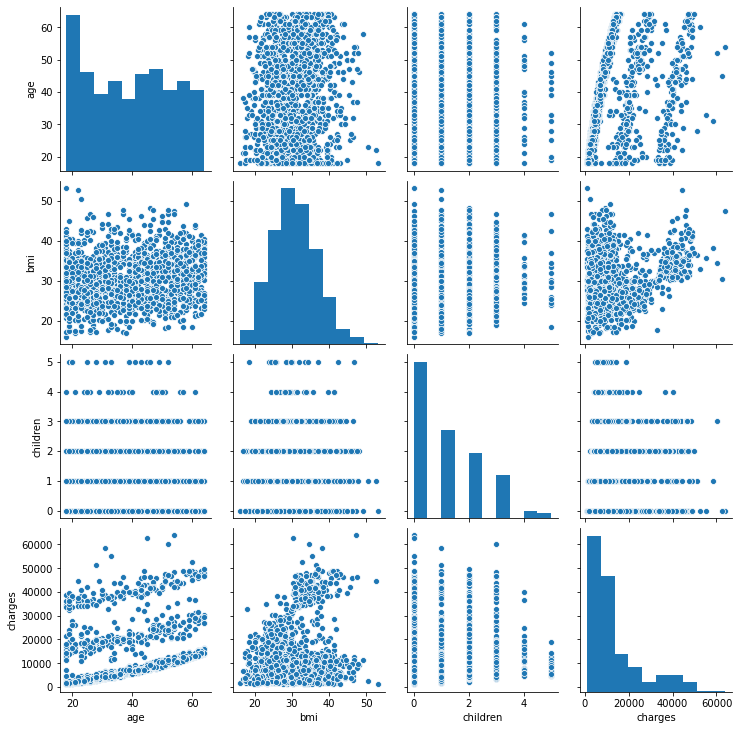

In [ ]:
# visualization 1

sns.pairplot(data)

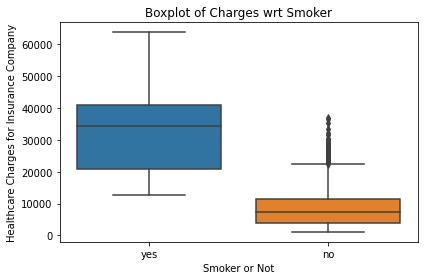

In [ ]:
# visualization 2
sns.boxplot(data['smoker'], data['charges'])
plt.title('Boxplot of Charges wrt Smoker')
plt.ylabel('Healthcare Charges for Insurance Company')
plt.xlabel('Smoker or Not')
plt.tight_layout()

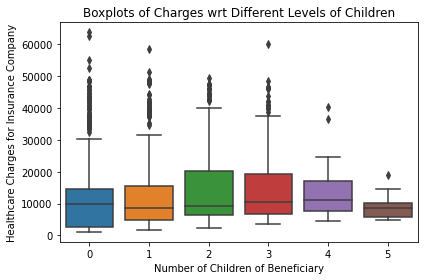

In [ ]:
# visualization 3
sns.boxplot(data['children'], data['charges'])
plt.title('Boxplots of Charges wrt Different Levels of Children')
plt.ylabel('Healthcare Charges for Insurance Company')
plt.xlabel('Number of Children of Beneficiary')
plt.tight_layout()

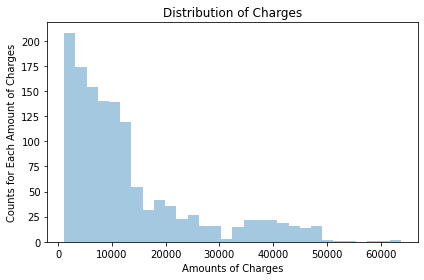

In [ ]:
# visualization 4
sns.distplot(data['charges'], kde = False)
plt.title('Distribution of Charges')
plt.ylabel('Counts for Each Amount of Charges')
plt.xlabel('Amounts of Charges')
plt.tight_layout()

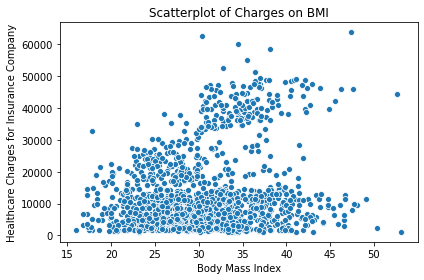

In [ ]:
# visualization 5
sns.scatterplot(data['bmi'], data['charges'])
plt.title('Scatterplot of Charges on BMI')
plt.ylabel('Healthcare Charges for Insurance Company')
plt.xlabel('Body Mass Index')
plt.tight_layout()

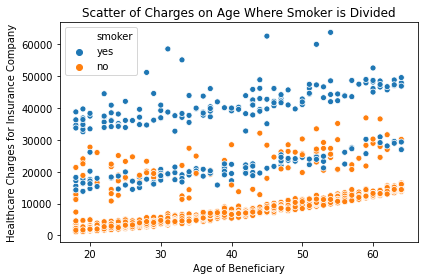

In [ ]:
# visualization 6
sns.scatterplot(data['age'], data['charges'], hue = data['smoker'])
plt.title('Scatter of Charges on Age Where Smoker is Divided')
plt.ylabel('Healthcare Charges for Insurance Company')
plt.xlabel('Age of Beneficiary')
plt.tight_layout()

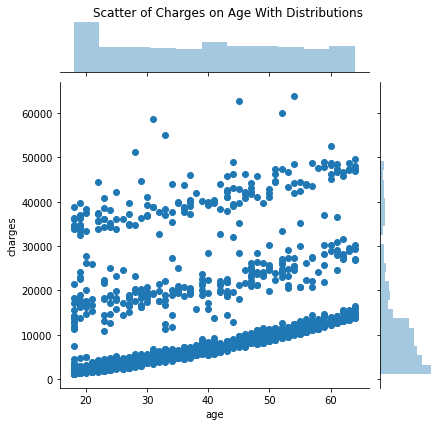

In [ ]:
# visualization 7
sns.jointplot(data['age'], data['charges'])
plt.suptitle('Scatter of Charges on Age With Distributions')
plt.subplots_adjust(top = .95)
#I cant seem to add axis label without them looking weird
#plt.ylabel('Healthcare Charges for Insurance Company')
#plt.xlabel('Age of Beneficiary')

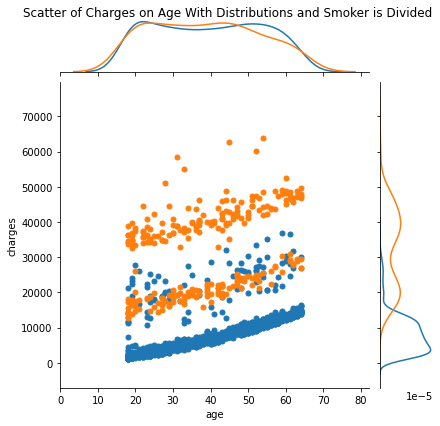

In [ ]:
# visualization 8
plot = sns.JointGrid("age", "charges", data)
for day, day_tips in data.groupby("smoker"):
  sns.kdeplot(day_tips["age"], ax=plot.ax_marg_x, legend=False)
  sns.kdeplot(day_tips["charges"], ax=plot.ax_marg_y, vertical=True, legend=False)
  plot.ax_joint.plot(day_tips["age"], day_tips["charges"], "o", ms=5)
plt.suptitle('Scatter of Charges on Age With Distributions and Smoker is Divided')
plt.subplots_adjust(top = 0.95)

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*
Dealing with Nans
1. use heatmap to see if any nans are in the data 

Dealing with string values in numerical columns
1. create a list of numerical columns
2. create a copy of data that has booleans for if the variable value is a string. If not it is False
3. iterate over numerical columns to check if all values in a column are not strings

Dealing with outliers
1. create figure of 4 subplots
2. use the numerical columns list to iterate over
3. for each column, plot the boxplot of the column
4. if there are outliers in any of the boxplots, iterate over the numerical columns again
5. create copy of data to be the copy without outliers
6. define first quartile, third quartile, and IQR range
7. create an index to determine which datapoints are in the threshold and out of the threshold with boolean values
8. replace false values with nans
9. remove rows with nans
10. check outliers are removed 

Dummy coding smoker
1. create array with pd.get_dummies dropping the first category
2. set array = to smoker column

since yes is the first instance in smoker column, it will be classified as 1. I want to dummy code smoker because I will use it later in binary classification



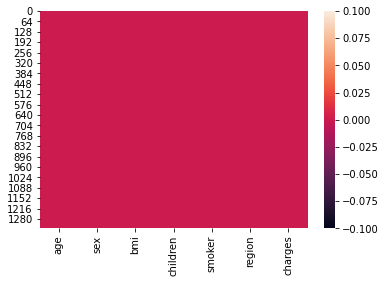

In [ ]:
# Check and take care of null values
sns.heatmap(data.isnull())

In [ ]:
# Check and take care of string values
num_col_list = ['age', 'bmi', 'children', 'charges']
string_checker = data.applymap(type)==str
print(string_checker)

print('for numerical columns: ')
for col in num_col_list:
  if all(string_checker[col]) == True:
    print(col + ' has strings!')
  elif all(string_checker[col]) == False:
    print(col + ' has no strings!')

        age   sex    bmi  children  smoker  region  charges
0     False  True  False     False    True    True    False
1     False  True  False     False    True    True    False
2     False  True  False     False    True    True    False
3     False  True  False     False    True    True    False
4     False  True  False     False    True    True    False
...     ...   ...    ...       ...     ...     ...      ...
1333  False  True  False     False    True    True    False
1334  False  True  False     False    True    True    False
1335  False  True  False     False    True    True    False
1336  False  True  False     False    True    True    False
1337  False  True  False     False    True    True    False

[1338 rows x 7 columns]
for numerical columns: 
age has no strings!
bmi has no strings!
children has no strings!
charges has no strings!


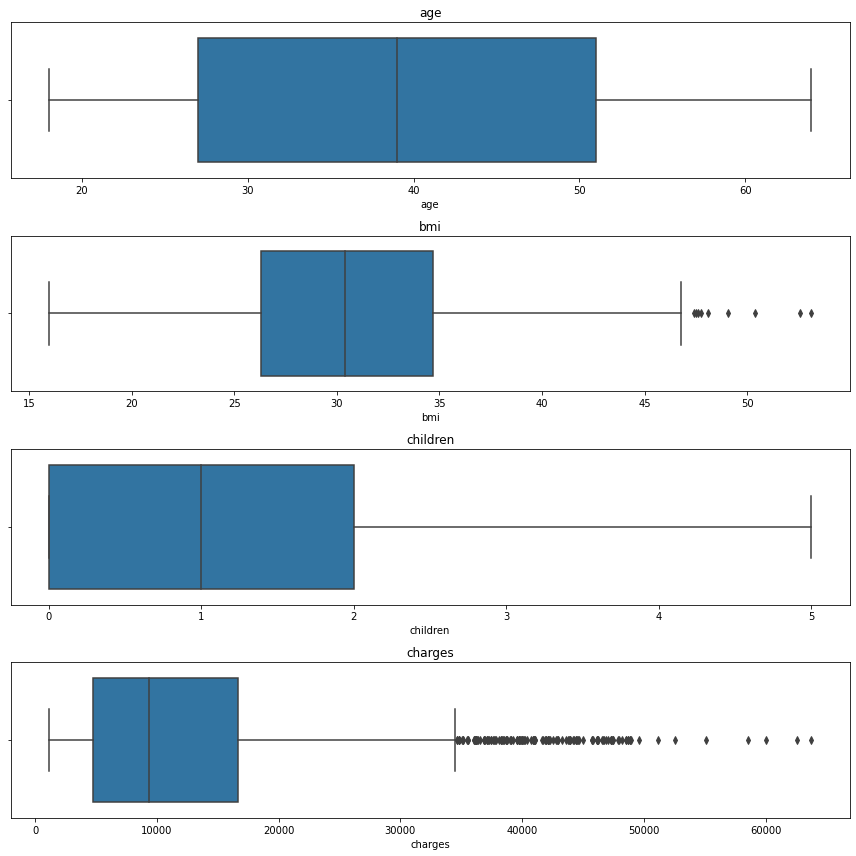

In [ ]:
# Check and take care of outliers
num_col_list = ['age', 'bmi', 'children', 'charges']

#checking outliers
fig,axes = plt.subplots(4, 1, figsize = (12, 12))
counter = 0
for col in num_col_list:
  data[col] = data[col].astype(float)
  sns.boxplot(x = data[col], ax = axes[counter])
  axes[counter].title.set_text(col)
  counter += 1
plt.tight_layout()

In [ ]:
#removing outliers from copy data
num_col_list = ['age', 'bmi', 'children', 'charges']
data_no_out = data.copy()

for col in num_col_list:
  Q1 = data_no_out[col].quantile(.25)
  Q3 = data_no_out[col].quantile(.75)
        
  IQR = Q3 - Q1
        
  #creating a boolean array of values that satisfy thresholds
  #true keep 
  #false outside of thresholds
  index = (data_no_out[col] > (Q1 - (1.5 * IQR))) & (data_no_out[col] < (Q3 + (1.5 * IQR)))
        
  #actually selecting the values
  data_no_out[col] = np.where(index, data_no_out[col], np.nan)

In [ ]:
data_no_out.dropna(axis = 0, inplace = True)
print('no outlier data length: ', len(data_no_out))
print('data w/ outlier length: ', len(data))

no outlier data length:  1175
data w/ outlier length:  1338


In [ ]:
#checking outliers removed
data_no_out.describe()
data_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1175 non-null   float64
 1   sex       1175 non-null   object 
 2   bmi       1175 non-null   float64
 3   children  1175 non-null   float64
 4   smoker    1175 non-null   object 
 5   region    1175 non-null   object 
 6   charges   1175 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.4+ KB


In [ ]:
# Any additional feature engineering
#dummy coding smoker
data2 = pd.get_dummies(data['smoker'], drop_first = True)
data['smoker'] = data2
data['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: uint8

***************
***************
# **Analysis section**

##Machine Learning 1 Pseudocode##
1. set X equal to age and charges and set y equal to smoker
2. create kmeans moel with 3 cluster and n_init = 10
3. fit the data and find predicted values
4. find the centers of clusters
5. plot scatter of charges on ages
6. plot centers on scatter 
7. set title
8. create array of np.where to identify separate clusters for observations
9. divide clusters into separate dataframes
10. remove outliers of dataframes of clusters 

For each cluster:
1. define x as age and y as charges
2. create model
3. fit model
4. find predicted values and set = to variable
5. print training and testing scores
6. plot scatter of charges on age for training and testing
7. use predicted values of training and testing x to plot linear regression
8. make kfold object
9. get kfold cross validation scores of training and testing and print both

##Machine Learning 2 Pseudocode##
1. set predictors (x) = charges and age columns
2. target array = smoker column
3. split data into testing and training
4. create SVM object with data fit to training data
5. create line equation for both training and testing data
6. create figure with two subplots
7. for both subplots plot the linear equations and scatters of charges on age
8. make kfold object
9. get kfold cross validation scores of training and testing accuracy and f1 scores and print all four


Machine Learning 1: KMeans Clustering with Linear Regressions for Each Cluster

Text(0.5, 1.0, 'Predicted clusters with centers')

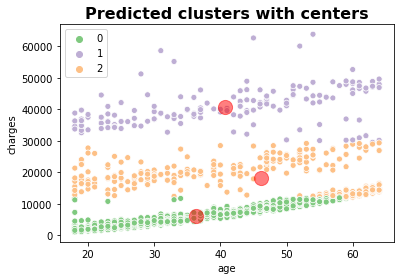

In [ ]:
# Machine Learning 1

X = data[['age', 'charges']]
y = data['smoker']

#get clusters
kmeans = KMeans(n_clusters=3,random_state=2,n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
sns.scatterplot(X['age'], X['charges'], hue=y_kmeans,palette='Accent')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('Predicted clusters with centers', fontsize=16, fontweight='bold')

In [ ]:
#making array of clusters identification for data column
cluster_array = np.where(y_kmeans == 0, 'low', 
         (np.where(y_kmeans == 1, 'high', 'medium')))
data['cluster_id'] = cluster_array

In [ ]:
#isolating low, medium, and high data
data1 = data[data['cluster_id'] == 'low']
data2 = data[data['cluster_id'] == 'medium']
data3 = data[data['cluster_id'] == 'high']

cluster_data_list = [data1, data2, data3]

print('before outlier removal, data1 length is: ', len(data1))
print('before outlier removal, data2 length is: ', len(data2))
print('before outlier removal, data3 length is: ', len(data3))


#removing outliers of clusters
for dat in cluster_data_list:
  num_col_list = ['age', 'bmi', 'children', 'charges']
  for col in num_col_list:
    Q1 = dat[col].quantile(.25)
    Q3 = dat[col].quantile(.75)
        
    IQR = Q3 - Q1      
    index = (dat[col] > (Q1 - (1.5 * IQR))) & (dat[col] < (Q3 + (1.5 * IQR)))
        
    #actually selecting the values
    dat[col] = np.where(index, dat[col], np.nan)
    dat.dropna(axis = 0, inplace = True)

print('after outlier removal, data1 length is: ', len(data1))
print('after outlier removal, data2 length is: ', len(data2))
print('after outlier removal, data3 length is: ', len(data3))

before outlier removal, data1 length is:  851
before outlier removal, data2 length is:  324
before outlier removal, data3 length is:  163
after outlier removal, data1 length is:  826
after outlier removal, data2 length is:  321
after outlier removal, data3 length is:  153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


linear regression for cluster 1
holdout R^2 score on training: 0.8975304907223464
holdout R^2 score on testing: 0.8919643635169071
linear equation is: y = 247.29x + -2806.01
mean of y:  6139.387440047207
median of y:  5950.633599999999
std of y:  3230.4039853941267


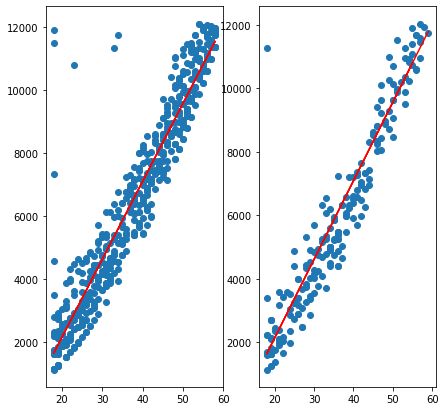

In [ ]:
#make linear regressions for each cluster
#when cluster = 1

X = data1[['age']]
y = data1['charges']

#holdout cross validation
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

#making the model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing scores
print('linear regression for cluster 1')
print('holdout R^2 score on training: ' + str(model.score(X_train, y_train)))
print('holdout R^2 score on testing: ' + str(model.score(X_test, y_test)))

#printing linear equation and descriptive stats
print('linear equation is: y = ' + str(round(model.coef_[0], 2)) + 'x + ' + str(round(model.intercept_, 2)))
print('mean of y: ', np.mean(y))
print('median of y: ', np.median(y))
print('std of y: ', np.std(y))

#creating figure and plotting 
fig, axes = plt.subplots(1, 2, figsize = [7, 7])

axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_model_train, color = 'r')

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_model_test, color = 'r')

In [ ]:
#cluster 1 scores with kfold
X = data1[['age']]
y = data1['charges']

model = LinearRegression()
kfold = model_selection.KFold(n_splits = 15)
results = model_selection.cross_validate(model, X, y, cv = kfold, return_train_score = True, scoring = ('r2'))
print('kfold training score is : ', np.mean(results['train_score']))
print('kfold testing score is : ', np.mean(results['test_score']))

kfold training score is :  0.8968196893799287
kfold testing score is :  0.8990382496300704


linear regression for cluster 2
holdout R^2 score on training: 0.02502287429953487
holdout R^2 score on testing: 0.06990505018580306
linear equation is: y = -49.81x + 20412.53
mean of y:  18149.068790467292
median of y:  17352.6803
std of y:  4940.099289945128


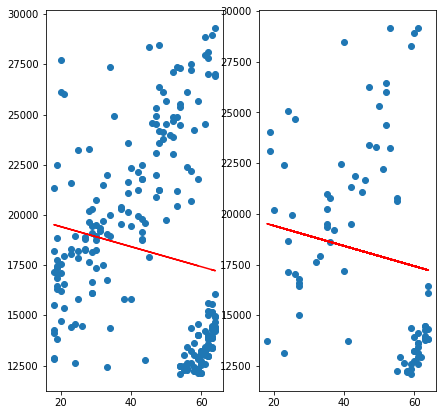

In [ ]:
#when cluster = 2
X = data2[['age']]
y = data2['charges']

#holdout cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

#making model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing scores
print('linear regression for cluster 2')
print('holdout R^2 score on training: ' + str(model.score(X_train, y_train)))
print('holdout R^2 score on testing: ' + str(model.score(X_test, y_test)))

#printing linear equation and descriptive stats
print('linear equation is: y = ' + str(round(model.coef_[0], 2)) + 'x + ' + str(round(model.intercept_, 2)))
print('mean of y: ', np.mean(y))
print('median of y: ', np.median(y))
print('std of y: ', np.std(y))

#creating figure and plotting 
fig, axes = plt.subplots(1, 2, figsize = [7, 7])

axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_model_train, color = 'r')

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_model_test, color = 'r')

In [ ]:
#cluster 2 scores with kfold
X = data2[['age']]
y = data2['charges']

model = LinearRegression()
kfold = model_selection.KFold(n_splits = 15)
results = model_selection.cross_validate(model, X, y, cv = kfold, return_train_score = True, scoring = ('r2'))
print('kfold training score is : ', np.mean(results['train_score']))
print('kfold testing score is : ', np.mean(results['test_score']))

kfold training score is :  0.03859406998056058
kfold testing score is :  0.007762984069917541


linear regression for cluster 2
holdout R^2 score on training: 0.2531624300968214
holdout R^2 score on testing: 0.23813504717778824
linear equation is: y = 179.99x + 32874.9
mean of y:  40140.55860666669
median of y:  39725.51805
std of y:  5317.933340210308


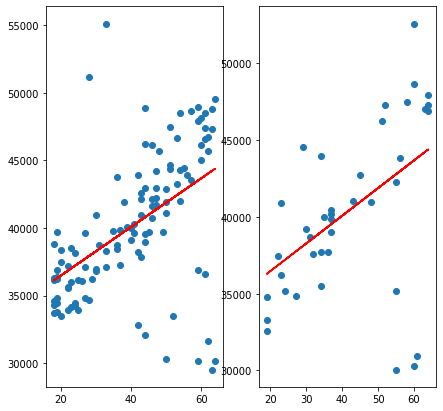

In [ ]:
#when cluster = 3
X = data3[['age']]
y = data3['charges']

#holdout cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

#creating model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing scores
print('linear regression for cluster 2')
print('holdout R^2 score on training: ' + str(model.score(X_train, y_train)))
print('holdout R^2 score on testing: ' + str(model.score(X_test, y_test)))

#printing linear equation and descriptive stats
print('linear equation is: y = ' + str(round(model.coef_[0], 2)) + 'x + ' + str(round(model.intercept_, 2)))
print('mean of y: ', np.mean(y))
print('median of y: ', np.median(y))
print('std of y: ', np.std(y))

#creating figure and plotting
fig, axes = plt.subplots(1, 2, figsize = [7, 7])

axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_model_train, color = 'r')

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_model_test, color = 'r')

In [ ]:
#cluster 3 scores with kfold
X = data3[['age']]
y = data3['charges']

model = LinearRegression()
kfold = model_selection.KFold(n_splits = 15)
results = model_selection.cross_validate(model, X, y, cv = kfold, return_train_score = True, scoring = ('r2'))
print('kfold training score is : ', np.mean(results['train_score']))
print('kfold testing score is : ', np.mean(results['test_score']))

kfold training score is :  0.2508232892904039
kfold testing score is :  0.21758342031402345


Machine Learning 2: Support Vector Machine

holdout score for training is:  0.938185443668993
holdout score for testing is :  0.9253731343283582
holdout f1 training score is:  0.8675213675213675
holdout f1 testing score is:  0.8175182481751826


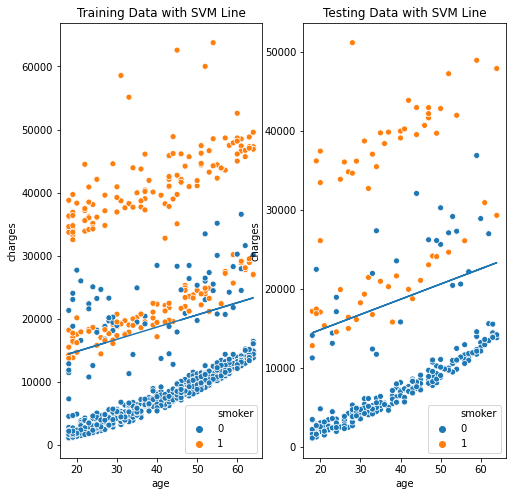

In [ ]:
# Machine Learning 2, if needed
#support vector classification for smoker
X = data[['age', 'charges']]
y = data['smoker']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

#create model
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
y_predict_train = svc_model.predict(X_train)
y_predict_test = svc_model.predict(X_test)

#printing scores
print('holdout score for training is: ', svc_model.score(X_train, y_train))
print('holdout score for testing is : ', svc_model.score(X_test, y_test))
print('holdout f1 training score is: ', metrics.f1_score(y_train, y_predict_train))
print('holdout f1 testing score is: ', metrics.f1_score(y_test, y_predict_test))

#line equation for training
w = svc_model.coef_[0]
slope = -w[0] / w[1]
intercept = -svc_model.intercept_[0]/w[1]
yy = slope * X_train['age'] + intercept

#line equation for testing
w2 = svc_model.coef_[0]
slope2 = -w2[0] / w2[1]
intercept2 = -svc_model.intercept_[0]/w2[1]
yy2 = slope2 * X_test['age'] + intercept2

#create figure
fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes = axes.flatten()


#plot training
sns.scatterplot(X_train['age'], X_train['charges'], hue = y_train, ax = axes[0])
axes[0].plot(X_train['age'],yy)
axes[0].set_title('Training Data with SVM Line')

#plot testing
sns.scatterplot(X_test['age'], X_test['charges'], hue = y_test, ax = axes[1])
axes[1].plot(X_test['age'],yy2)
axes[1].set_title('Testing Data with SVM Line');

In [ ]:
#Note: this cell takes forever to load but it does print the scores

#SVM scores with kfold
X = data[['age', 'charges']]
y = data['smoker']

#creating model and cross validating 
svc_model = SVC(kernel = 'linear')
shufflesplit = model_selection.ShuffleSplit(n_splits = 15, random_state = 15)
results = model_selection.cross_validate(svc_model, X, y, cv = shufflesplit, return_train_score = True, scoring = ('f1', 'accuracy'))

#printing results
print('shufflesplit training score is : ', np.mean(results['train_accuracy']))
print('shufflesplit testing score is : ', np.mean(results['test_accuracy']))
print('shufflesplit training f1 score is : ', np.mean(results['train_f1']))
print('shufflesplit testing f1 score is : ', np.mean(results['test_f1']))

shufflesplit training score is :  0.9375415282392026
shufflesplit testing score is :  0.9298507462686568
shufflesplit training f1 score is :  0.862938280340422
shufflesplit testing f1 score is :  0.8428163454609578


***************
***************
# **Conclusions**

From my data I learned a few quite valuable pieces of information: 

###Data Groupings of Charges on Age###
First of all, I want to focus on the visualizations that have charges on age. These visualizations seemingly show that the data is grouped in three groups. Visualization 8 shows that separating the data by smoker splits the data with little overlap wrt charges. I suspect the divide comese from varying levels of pre-existing conditions and other factors that influence charges. This explains why most of the division of these groups are with respect to charges and not age.  

To group the data, I used kmeans clustering. This was a surprisingly effective method. Although the grouping doesn't seem to be perfect and that reflects in my results. With kmeans clustering, I took the linear regressions of each cluster and found for each:
1. the first cluster or the "low" group has a very strong linear regression of predicting charges from age. This is because by just focusing on the low group, which has very low charge variance, you can easily fit a line through the smaller, tighter data. Also since they're less susceptible to more expensive procedures, their costs are much more predictable.
2. the second cluster clearly follows a pattern but is skewed heavily by the data that got included from the real lower group. This model would be much better fit to the data
 with the exclusion of the datapoints in the bottom right that ought to have been with the low cluster. 
3. the third cluster's linear regression is much better fitted than the second group but its fit is not nearly as strong as the low group. Such a low score indicates that this regression is not great for predicting data. This is likely to do with the generally high variance in charges the cluster suffers from. Much of this cluster would have been excluded if chose to use the outlier excluded data. The high variance, and therefore low score, can probably be explained due to the low amount of observations in this cluster and this is most likely because people in general don't have medical charges that are this high. Generally speaking, such expensive charges indicate they have a less common procedure. The less common a procedure, the less likely it is to occur and more likely it is to be expensive. So the third group most likely has multiple different kinds of procedures included as well. All of this would help explain the low fit of data even though visually it seems to follow the trend of the cluster

The kmeans clustering into linear regression approach I took was not perfect but shows certain patterns and indicators that help support my hypothesis for the groupings you can see in the aforementioned visualizations.

I also want to mention that I chose not to exclude the outliers from my data. This is because the outliers largely made up the high group of my data. My initial motivations for doing this sort of analysis of kmeans into linear regressions were to examine each group individually. If I had removed the outliers, I would have only two groups and some remaining from the high group. This would lead me to use kmeans for two clusters which would not be as desirable.

###Support Vector Machines for Classifying Smoker###
In the previous section, I mentioned that I thought the grouping of the plots for charges on age were due to pre-existing conditions. This would have some correlary relationship with smoking so I wanted to also analyze the ability to predict smoking. Turning smoking into a binary column, I used support vector machines to divide the data, where charges and age are predictors, to predict whether an observation is a smoker or not. My SVM worked with a score of .94 for the training data and .93 for the testing data. This classification was very effect largely due to the surprising fact that no observation in the low group are smokers. The low group is also the most densely populated group so the SVM's ability to draw the line above the low group immediately made most of the data true negatives. The SVM approach for predicting smokers with age and charges went very well.

Just as in the previous section, I also chose not to remove outliers for this analysis. This is largely because the high group had almost all smokers. Removing such data seemed quite unnecessary and harmful to our analysis with SVM. Removing the outliers would have also lowered our score for no good reason as all of the high group are smokers and are correctly classified as such by the SVM. The exclusion of some of these by removing outliers would have lowered the number of true positives. There simply was no good apparent reason to remove outliers given the data and kind of analysis I wanted to do. 

###Final Conclusion###
I think there is definitely reason to suspect that pre-existing conditions and underlying health factors are, at least partially, responsible for much of the extreme variance in y. More data specifically on the health of the beneficiaries would have been much more helpful for this analysis. The fact that our SVM can strongly predict smoking or not seems to show this. While it is unfortunate that the groupings seem to break down in their linear relationships the more charges are, I believe this follows the intuition that such higher charges are most likely attributable to more rare and expensive procedures that most people (the lower group) do not have to bear. Data on the number of unique procedures for each cluster would be able to confirm this explanation. Nonetheless, there has definitely been as much progress in explaining the clustered variance of charges as I can do with the data and tools given to me. 

